## Packages and plotting settings

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

#%% Plotting options
#Set up plot parameters
color_bg      = "0.99"          #Choose background color
color_gridaxe = "0.85"          #Choose grid and spine color
rc = {"axes.edgecolor":color_gridaxe} 
plt.style.use(('ggplot', rc))           #Set style with extra spines
plt.rcParams['figure.dpi'] = 300        #Set resolution
plt.rcParams["figure.figsize"] = (10, 5) #Set figure size
matplotlib.rcParams['font.family'] = ['cmss10']     #Change font to Computer Modern Sans Serif
plt.rcParams['axes.unicode_minus'] = False          #Re-enable minus signs on axes))
plt.rcParams['axes.facecolor']= "0.99"              #Set plot background color
plt.rcParams.update({"axes.grid" : True, "grid.color": color_gridaxe}) #Set grid color
plt.rcParams['axes.grid'] = True

## Import and check dataset
read data, check shape, rename columns and print first 2 rows to see all parameters

In [119]:
#Read data
input1 = pd.read_csv("diabetes_binary_5050split_health_indicators.csv")

data = input1.copy()

#Check shape
print(f'Data has: \n {data.shape[0]} rows \n {data.shape[1]} columns \n Data shape is {data.shape}') 

#Rename data columns
data.rename(columns =  {'Income':'IncomeGroup',
                        'Education':'EducationGroup',
                        'Age':'AgeGroup'},
                        inplace = True)

raw = data.copy()

for i in range(0, data.shape[1]):
    new_name = str(i+1) + '-' + data.columns[i]
    data = data.rename(columns={data.columns[i]: new_name})
    
#Print 2 top rows with all parameters
print(f'\n The 2 first rows of the dataset are')
data.iloc[0:2]

Data has: 
 70692 rows 
 22 columns 
 Data shape is (70692, 22)

 The 2 first rows of the dataset are


,1-Diabetes,2-HighBP,3-HighChol,4-CholCheck,5-BMI,6-Smoker,7-Stroke,8-HeartDiseaseorAttack,9-PhysActivity,10-Fruits,...,13-AnyHealthcare,14-NoDocbcCost,15-GeneralHealth,16-MentalHealth,17-PhysicalHealth,18-DiffWalk,19-Sex,20-AgeGroup,21-EducationGroup,22-IncomeGroup
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8


#### Mean and standard deviation of dataset
Calculate mean and std of dataset, and store in copy of dataframe

In [29]:
#Calculate std and mean of dataset
pd.set_option('display.float_format', lambda x: '%.5f' % x) #Disable scientific notation

means = ["Mean", float("NaN"), float("NaN")] 
STDs = ["STD", float("NaN"), float("NaN")]

data_stats = data.copy()
for i in range(3,data_stats.shape[1]):
    d = data_stats.iloc[:,i]
    m = d.mean()
    s = np.std(d)
    means.append(m)
    STDs.append(s)
    
data_stats.loc[len(data)] = means
data_stats.loc[len(data)] = STDs

#Display dataframe with mean and STD data for each variable
stats = data_stats.iloc[-2:,3:].reset_index().rename(index = {0: "Mean", 1: "STD"}).drop(columns = ["index"])

print(stats.T.to_latex())

\begin{tabular}{lrr}
\toprule
{} &     Mean &      STD \\
\midrule
4-CholCheck            &  1.00000 &  0.15534 \\
5-BMI                  & 25.00000 &  7.11390 \\
6-Smoker               &  0.00000 &  0.49939 \\
7-Stroke               &  0.00000 &  0.24147 \\
8-HeartDiseaseorAttack &  1.00000 &  0.35491 \\
9-PhysActivity         &  1.00000 &  0.45692 \\
10-Fruits              &  1.00000 &  0.48734 \\
11-Vegetables          &  0.00000 &  0.40818 \\
12-HvyAlcoholConsump   &  0.00000 &  0.20223 \\
13-AnyHealthcare       &  1.00000 &  0.20739 \\
14-NoDocbcCost         &  0.00000 &  0.29171 \\
15-GeneralHealth       &  2.00000 &  1.11356 \\
16-MentalHealth        &  0.00000 &  8.15557 \\
17-PhysicalHealth      &  0.00000 & 10.06219 \\
18-DiffWalk            &  0.00000 &  0.43458 \\
19-Sex                 &  0.00000 &  0.49815 \\
20-AgeGroup            &  9.00000 &  2.85213 \\
21-EducationGroup      &  6.00000 &  1.02907 \\
22-IncomeGroup         &  2.00000 &  2.17518 \\
\bottomrule
\end{tabu

In [32]:
data.loc[:,'16-MentalHealth'].mean()

3.7520370056017653

In [190]:
#MCA

import prince
import seaborn as sns
from adjustText import adjust_text

df2 = raw.iloc[:,[0, 1, 2, 3,   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21]].copy()
df2.loc[:,'Sex'].replace({0: 'Female', 1:'Male'}, inplace = True, regex = True)
df2.replace({0: "False", 1: "True"}, inplace = True, regex = True)

# df2["GeneralHealth"] = df2["GeneralHealth"].apply(lambda x: x.replace("True", 1))

df2
mca = prince.MCA()
mca.fit(df2)

MCA()

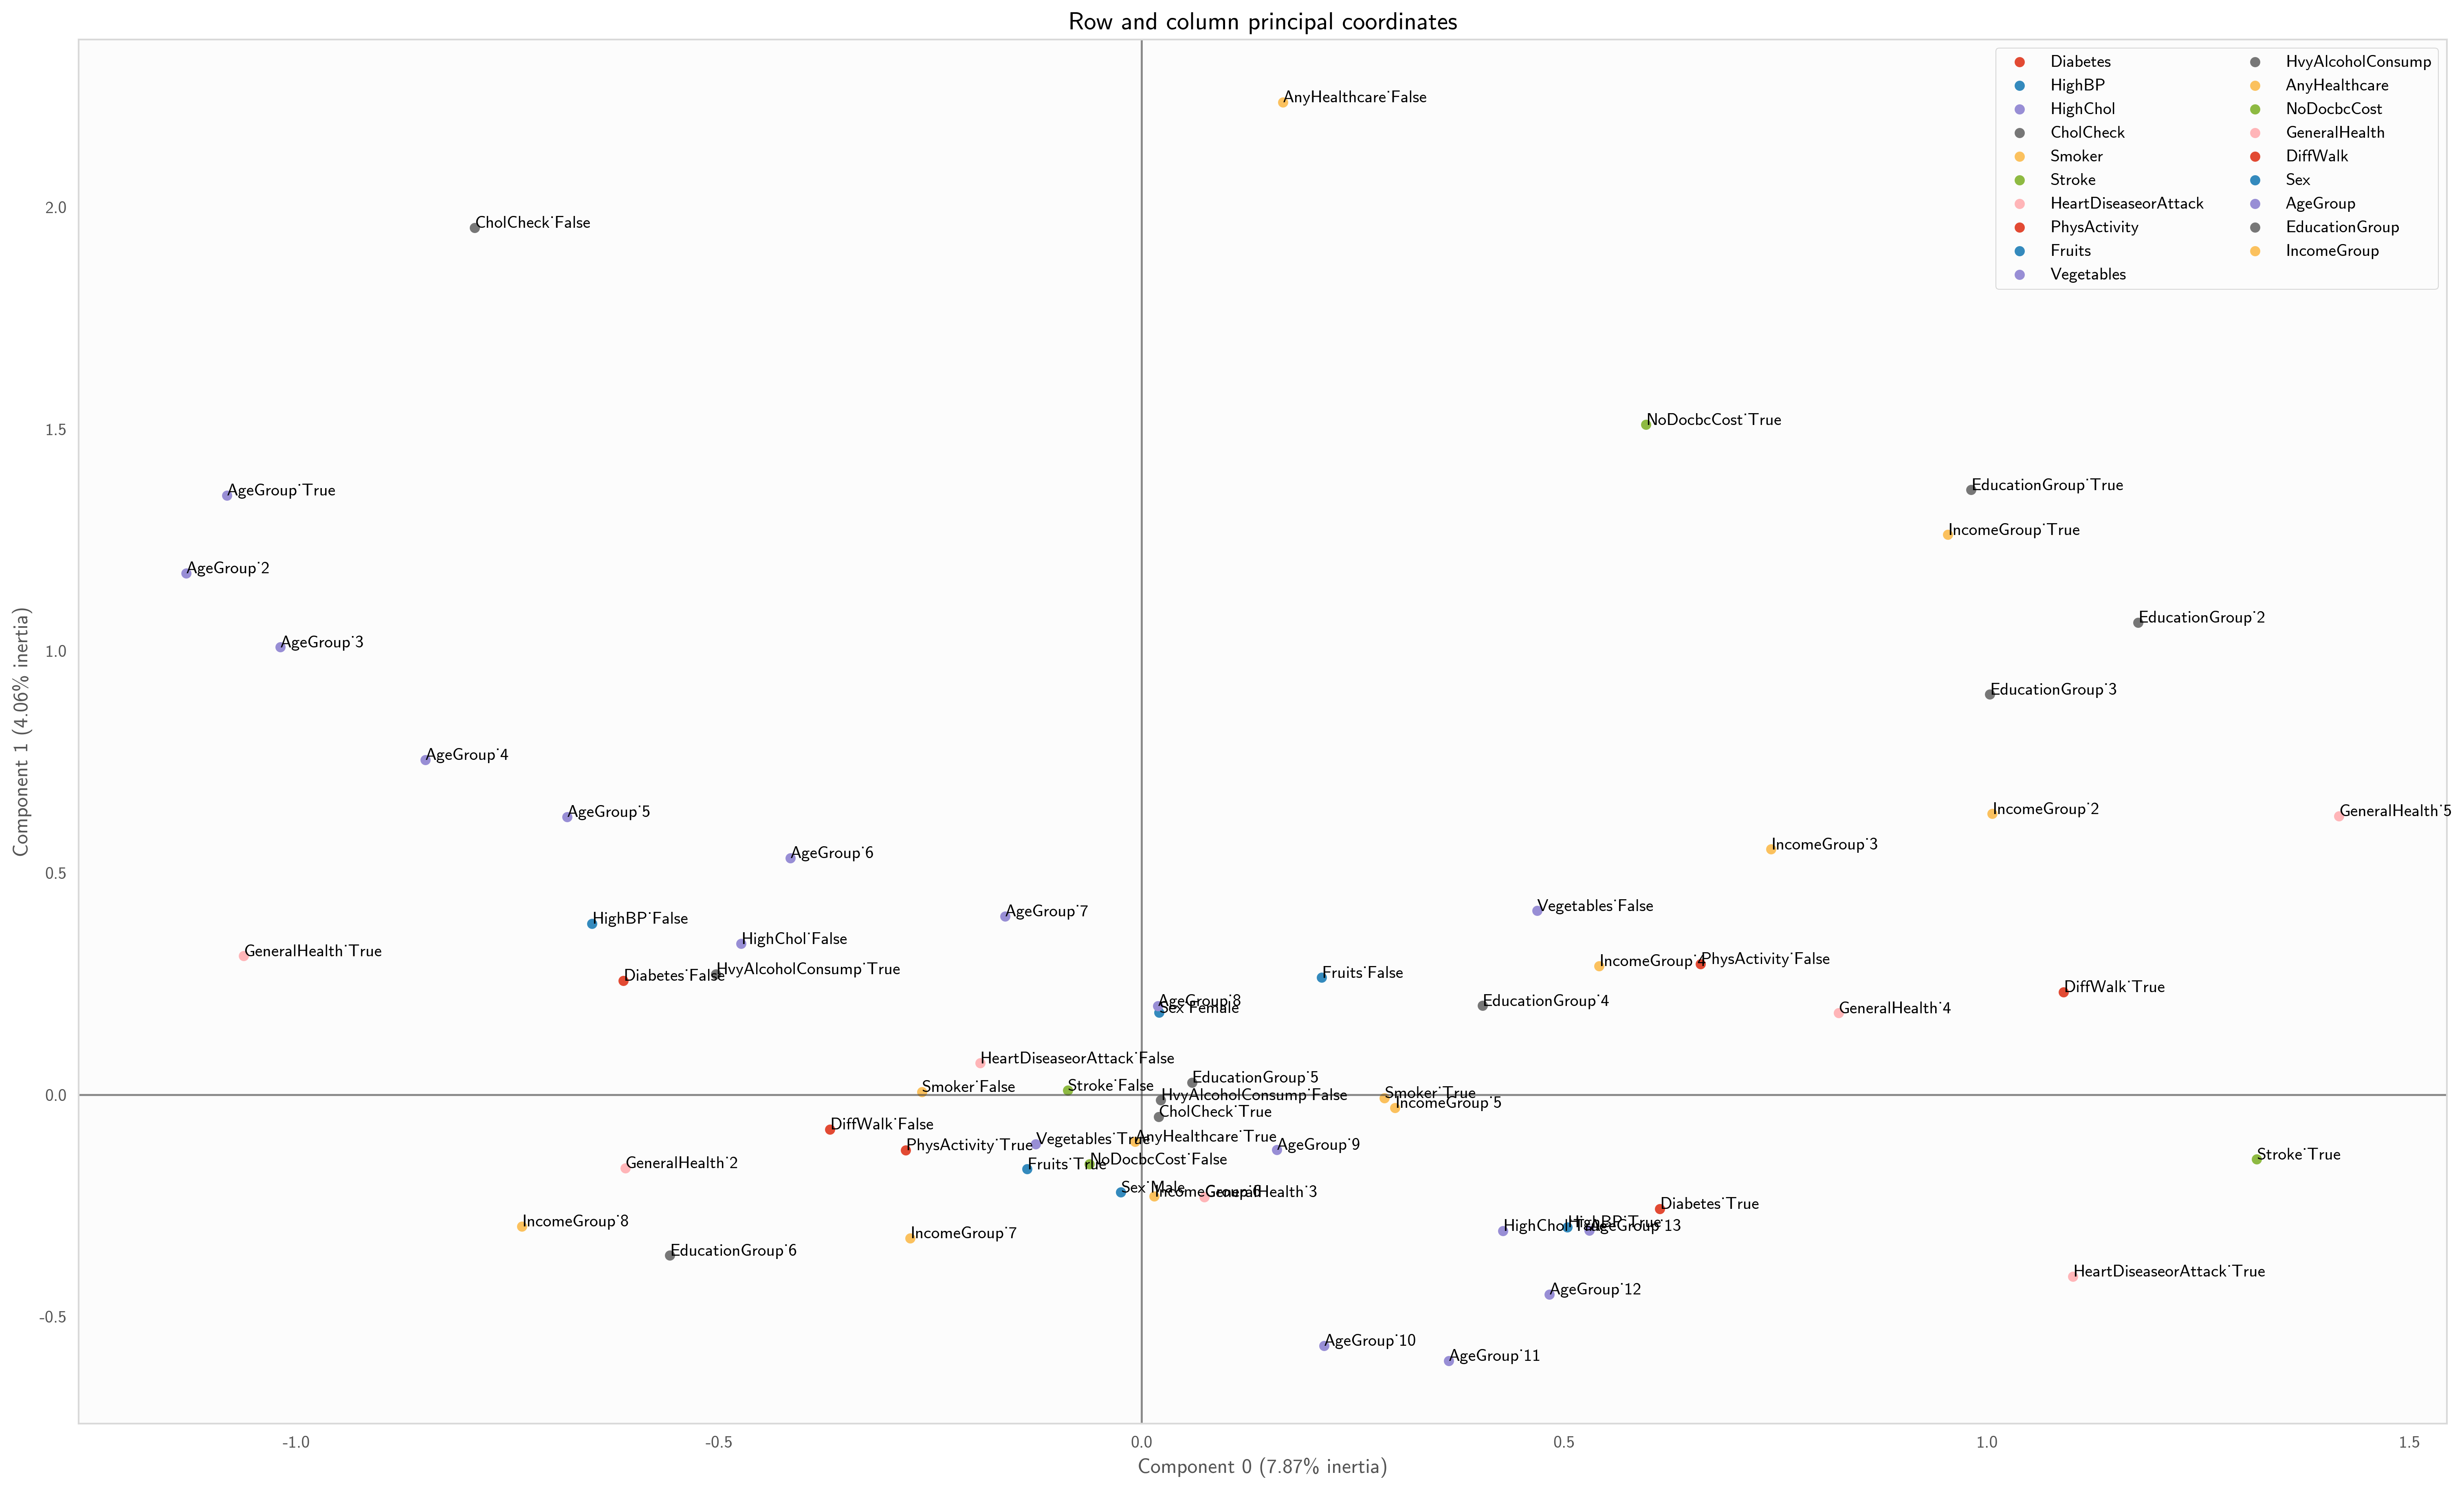

In [191]:
ax = mca.plot_coordinates(
     df2,
     ax = None,
     figsize = (25, 15),
    
     show_row_points = False,
     row_points_size = 10,
     show_row_labels = False,
    
     show_column_points = True,
     column_points_size = 30,
     show_column_labels = True,
    
     legend_n_cols=2
 )

fig = ax.get_figure()
# fig.savefig("MCA.eps", format = 'eps',bbox_inches='tight')

## Visualize dataset

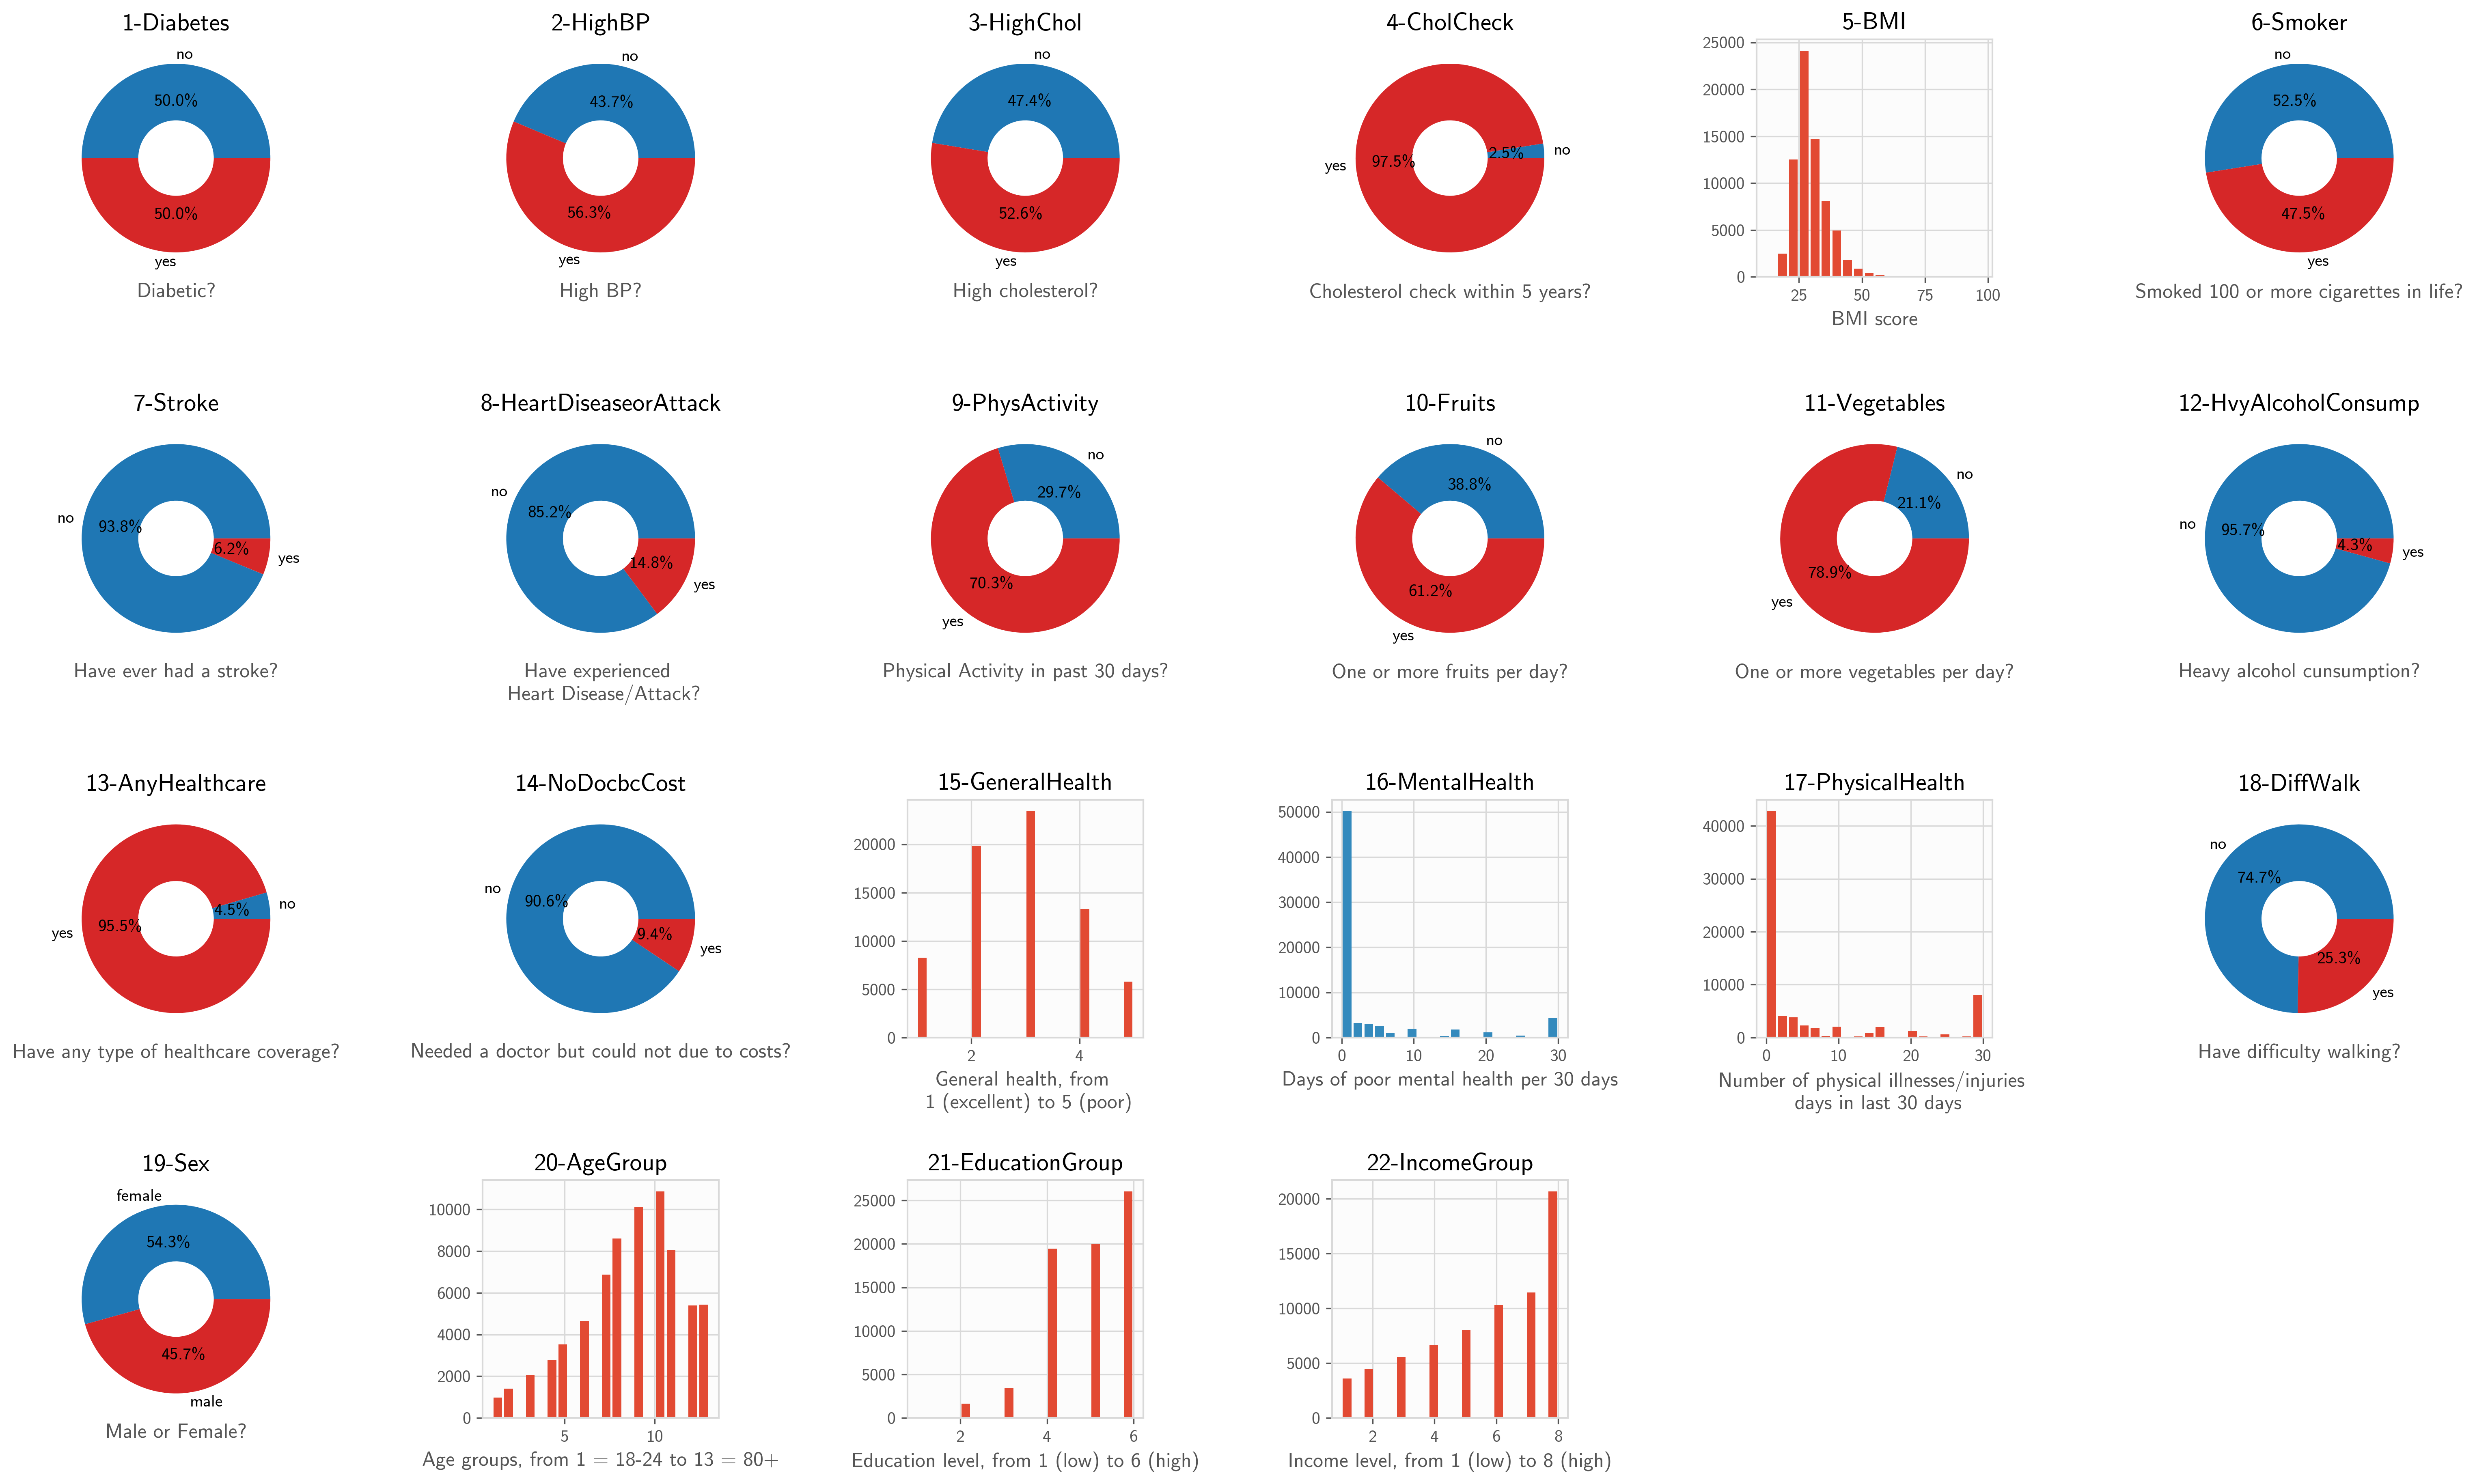

In [27]:
#Create figure
fig1, ax1 = plt.subplots(4,6, figsize = (25, 15))
plt.subplots_adjust(hspace = 0.6, wspace = 0.8) #Adjust spacing between plots
ax1 = ax1.ravel() #Get all axes in list of 20 for looping through
ax1[22].remove() #Remove unused subplot
ax1[23].remove() #Remove unused subplot

#Labels for each subplot
labels = np.array([['Diabetic?'],
                    ['High BP?'],
                    ['High cholesterol?'],
                    ['Cholesterol check within 5 years?'],
                    ['BMI score'],
                    ['Smoked 100 or more cigarettes in life?'],
                    ['Have ever had a stroke?'],
                    ['Have experienced \n Heart Disease/Attack?'],
                    ['Physical Activity in past 30 days?'],
                    ['One or more fruits per day?'],
                    ['One or more vegetables per day?'], #10
                    ['Heavy alcohol cunsumption?'],
                    ['Have any type of healthcare coverage?'],
                    ['Needed a doctor but could not due to costs?'],
                    ['General health, from \n 1 (excellent) to 5 (poor)'],
                    ['Days of poor mental health per 30 days'],
                    ['Number of physical illnesses/injuries \n days in last 30 days'],
                    ['Have difficulty walking?'],
                    ['Male/Female'],
                    ['Age groups, from 1 = 18-24 to 13 = 80+'],
                    ['Education level, from 1 (low) to 6 (high)'],
                    ['Income level, from 1 (low) to 8 (high)'],
                   ])

#Create all histograms
for i in [4, 15, 14, 15, 16, 19, 20, 21]:
    ax1[i].hist(data.iloc[:, i], 20, rwidth = 0.8)  # Create histogram
    ax1[i].set_title(data.columns[i]) #Set title
    ax1[i].set_xlabel(labels[i][0])

# Create all piecharts for yes/no questions
for i in [0, 1, 2, 3,   5, 6, 7, 8, 9, 10, 11, 12, 13,   17]:
    ax1[i].pie(data.iloc[:, i].value_counts().sort_index(),
               autopct='%1.1f%%', labels= ['no','yes'], wedgeprops=dict(width=0.6),
               colors = ['tab:blue', 'tab:red'])  # Create histogram
    ax1[i].set_title(data.columns[i]) #Set title
    ax1[i].set_xlabel(labels[i][0])

#Create histogram for female/male data
ax1[18].pie(data.iloc[:, 18].value_counts().sort_index(),
            autopct='%1.1f%%', labels= ['female','male'], wedgeprops=dict(width=0.6),
            colors = ['tab:blue', 'tab:red'])  # Create histogram    
ax1[18].set_title(data.columns[18]) #Set title
ax1[18].set_xlabel('Male or Female?')

#Save figure
fig1.savefig("Parameters.eps", format = 'eps',bbox_inches='tight')

#### Boxplots

<Figure size 3000x1500 with 0 Axes>

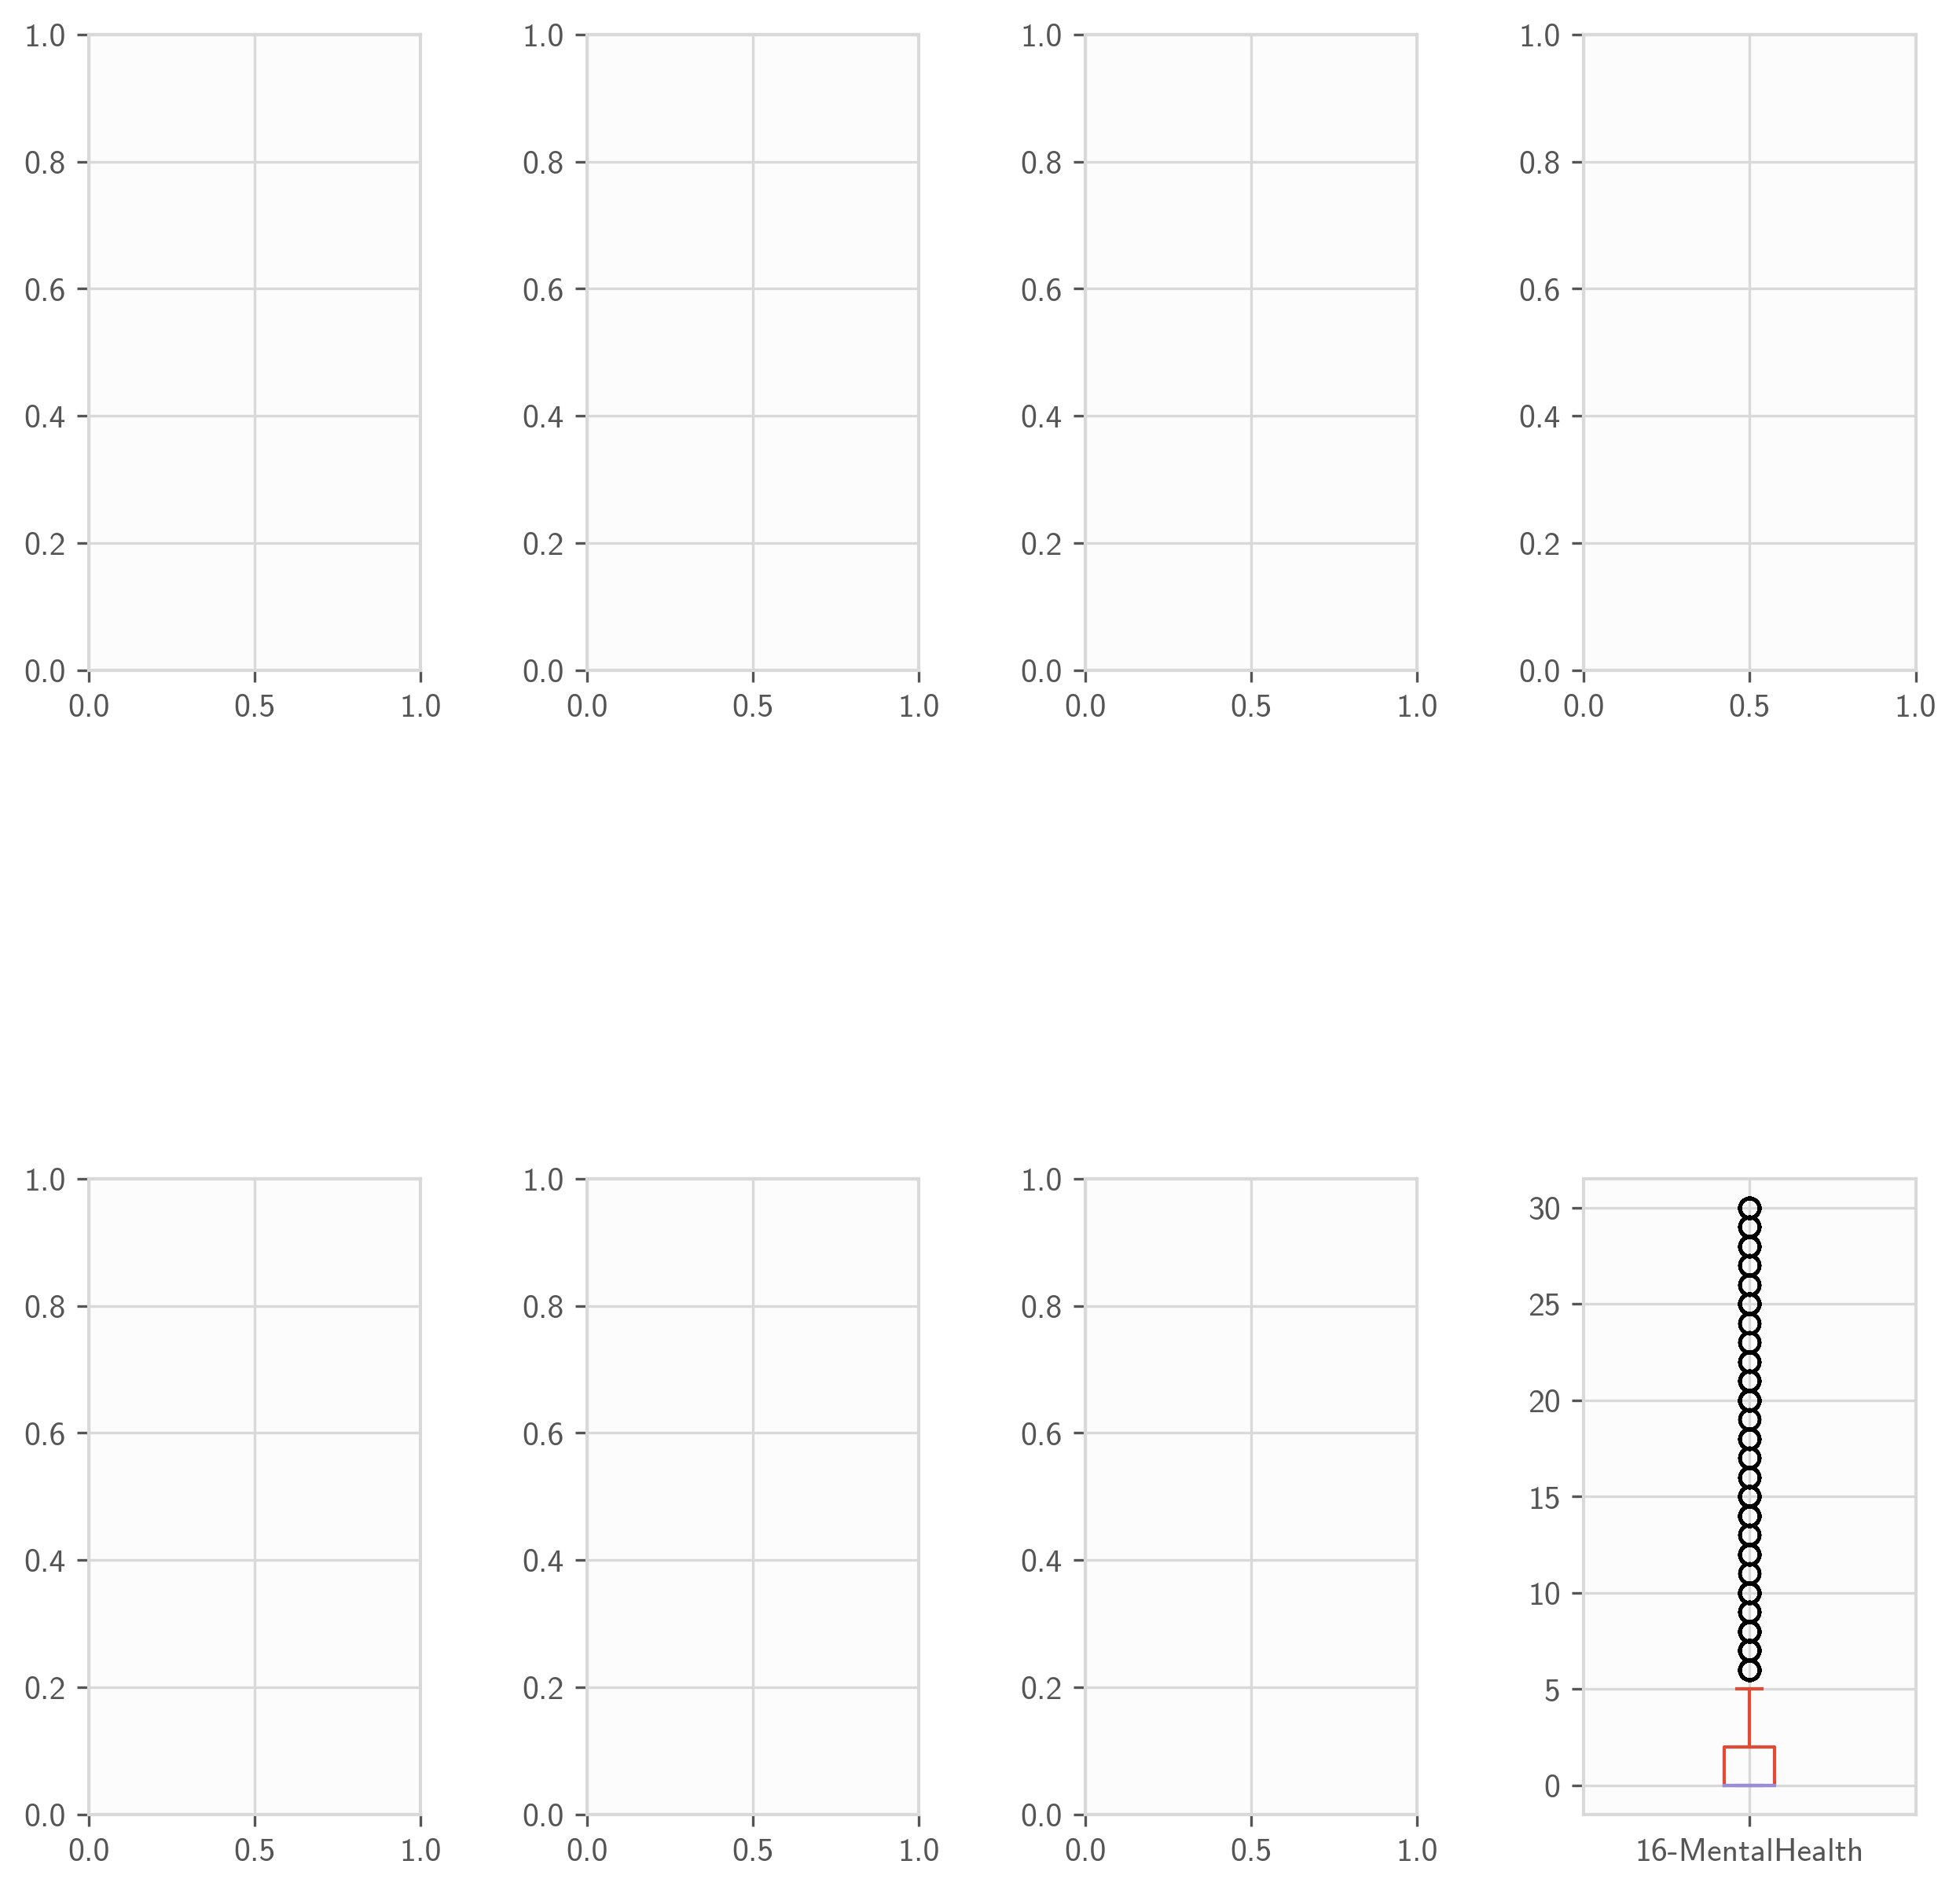

In [17]:
fig2 = plt.figure()
fig2, ax2 = plt.subplots(2,4, figsize = (15, 20))
plt.subplots_adjust(hspace = 0.8, wspace = 0.5) #Adjust spacing between plots

# ax2 = data.loc[:,'BMI'].plot(kind = 'box', 
#                              #subplots = True, 
#                              #layout = (6,4), 
#                              figsize = (10,10),
#                              #color = 'tab:blue'
#                             )

ax2[0] = data.loc[:,'16-MentalHealth'].plot(kind = 'box', 
                             #subplots = True, 
                             #layout = (6,4), 
                             figsize = (10,10),
                             #color = 'tab:blue'
                            )